In [3]:
import pandas as pd
import json
import numpy as np
import requests
from config import (client_id, api_key)
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
reviews = pd.read_csv("more_reviews.csv")

reviews.head()

,Unnamed: 0,Business ID,Review,Compound,Business Name,Business Alias,Category,City,State,ZipCode,Lat,Long,Review Count,Rating
0,0,f3rkiilfzZVJlK0oxsmjqQ,My case was finally put to rest this morning w...,0.6369,"Langston Law, Chartered",langston-law-chartered-olathe,lawyers,Olathe,KS,66061.0,38.881756,-94.818985,3,5.0
1,1,f3rkiilfzZVJlK0oxsmjqQ,"my work has volunteer program, that u can sign...",0.5853,"Langston Law, Chartered",langston-law-chartered-olathe,lawyers,Olathe,KS,66061.0,38.881756,-94.818985,3,5.0
2,2,f3rkiilfzZVJlK0oxsmjqQ,Mr. Langston has helped me through a couple of...,0.4767,"Langston Law, Chartered",langston-law-chartered-olathe,lawyers,Olathe,KS,66061.0,38.881756,-94.818985,3,5.0
3,3,t7LBdL4HifGJlMbn92WX7g,"If you are looking for a reliable, TRUSTWORTHY...",0.6523,Garretson & Toth,garretson-and-toth-olathe,criminaldefense,Olathe,KS,66061.0,38.881749,-94.819128,3,5.0
4,4,t7LBdL4HifGJlMbn92WX7g,"Tyler is an excellent, knowledgeable, consider...",0.8591,Garretson & Toth,garretson-and-toth-olathe,criminaldefense,Olathe,KS,66061.0,38.881749,-94.819128,3,5.0


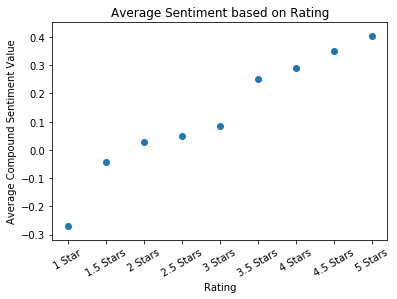

In [9]:
ratings_grouped = reviews.groupby(reviews["Rating"]).mean()

ratings_grouped

stars = ["1 Star", "1.5 Stars", "2 Stars", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

x_axis = np.arange(len(stars))

plt.scatter(stars, ratings_grouped["Compound"])
plt.xticks(rotation=30)
plt.title("Average Sentiment based on Rating")
plt.xlabel("Rating")
plt.ylabel("Average Compound Sentiment Value")

plt.show()

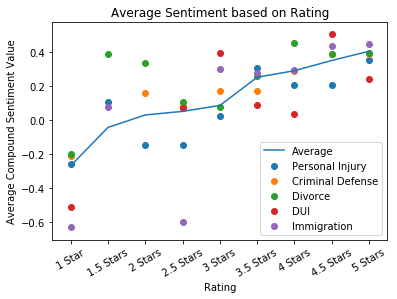

In [48]:
# Personal Injury Lawyers
ratings_personalin = reviews.loc[reviews["Category"] == "personal_injury"]
ratings_grouped_personalin = ratings_personalin.groupby(ratings_personalin["Rating"]).mean()

#Set general x axis values
stars = ["1 Star", "1.5 Stars", "2 Stars", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

#Criminal Defense Lawyers
ratings_crimedef = reviews.loc[reviews["Category"] == "criminaldefense"]
ratings_grouped_crimedef = ratings_crimedef.groupby(ratings_crimedef["Rating"]).mean()

stars_crimedef = ["1 Star", "2 Stars", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

#Divorce Lawyers
ratings_divorce = reviews.loc[reviews["Category"] == "divorce"]
ratings_grouped_divorce = ratings_divorce.groupby(ratings_divorce["Rating"]).mean()

#DUI Lawyers
ratings_dui = reviews.loc[reviews["Category"] == "duilawyers"]
ratings_grouped_dui = ratings_dui.groupby(ratings_dui["Rating"]).mean()

stars_dui = ["1 Star", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

#Immigration Lawyers
ratings_imm = reviews.loc[reviews["Category"] == "immigrationlawyers"]
ratings_grouped_imm = ratings_imm.groupby(ratings_imm["Rating"]).mean()

stars_imm = ["1 Star", "1.5 Stars", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

#Plot
plt.plot(stars, ratings_grouped["Compound"], label="Average")
plt.scatter(stars, ratings_grouped_personalin["Compound"], label="Personal Injury")
plt.scatter(stars_crimedef, ratings_grouped_crimedef["Compound"], label="Criminal Defense")
plt.scatter(stars, ratings_grouped_divorce["Compound"], label="Divorce")
plt.scatter(stars_dui, ratings_grouped_dui["Compound"], label="DUI")
plt.scatter(stars_imm, ratings_grouped_imm["Compound"], label="Immigration")
plt.xticks(rotation=30)
plt.title("Average Sentiment based on Rating")
plt.legend()
plt.xlabel("Rating")
plt.ylabel("Average Compound Sentiment Value")

plt.show()
